# Basic Usage Example: CMB Analysis with Advanced Sampling

This notebook demonstrates how to use the refactored CMB analysis package with HMC and NUTS sampling techniques.

## 1. Import Required Packages

First, import the necessary packages from the refactored `src.cmb` module.

In [32]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

# Clear any cached imports to ensure fresh load
import importlib
for mod in list(sys.modules.keys()):
    if mod.startswith('src.cmb'):
        del sys.modules[mod]

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from src.cmb import CosmologyAdvancedSampling, run_chain_hmc, run_chain_nut

print("Imports successful!")
print(f"TensorFlow Probability version: {tfp.__version__}")

Imports successful!
TensorFlow Probability version: 0.25.0


## 2. Create a CosmologyAdvancedSampling Model

Create a model instance with cosmological parameters:
- `lmax=8`: Maximum multipole moment
- `NSIDE=2`: HEALPix resolution parameter
- `noisesig=1.0`: Noise standard deviation

In [33]:
lmax = 8
NSIDE = 2
noisesig = 1.0

model = CosmologyAdvancedSampling(_lmax=lmax, _NSIDE=NSIDE, _noisesig=noisesig)
print(f"Model created with lmax={lmax}, NSIDE={NSIDE}, noisesig={noisesig}")

Model created with lmax=8, NSIDE=2, noisesig=1.0


## 3. Set Up Initial State for Sampling

Create an initial state for the MCMC sampler. The state dimension depends on the number of alm coefficients.

In [34]:
# Initialize at the origin with small random perturbation
# Use the model's x0 (initial parameters) to determine state dimension
state_dim = len(model.x0)
initial_state = tf.constant(np.random.randn(state_dim) * 0.1, dtype=tf.float64)
print(f"Initial state shape: {initial_state.shape}")

Initial state shape: (60,)


## 4. Run HMC Sampler

Run Hamiltonian Monte Carlo with a small number of samples for demonstration.

In [35]:
# Run HMC with short chain for demo
num_results = 100
num_burnin = 50
step_size = 0.01
num_leapfrog_steps = 2

print(f"Running HMC sampler with {num_results} samples and {num_burnin} burnin steps...")
samples, kernel_results = run_chain_hmc(
    model, 
    initial_state, 
    _step_size=step_size, 
    num_results=num_results, 
    num_burnin_steps=num_burnin,
    _n_lfs=num_leapfrog_steps
)
print(f"Sampling complete! Samples shape: {samples.shape}")

Running HMC sampler with 100 samples and 50 burnin steps...
Sampling complete! Samples shape: (100, 60)
Sampling complete! Samples shape: (100, 60)


## 5. Analyze Results

Compute basic statistics on the sampled parameters.

In [37]:
# Convert samples to numpy for analysis
samples_np = samples.numpy()

# Compute mean and standard deviation across all parameters
mean_vals = np.mean(samples_np, axis=0)
std_vals = np.std(samples_np, axis=0)

print(f"Mean parameter values (first 5): {mean_vals[:5]}")
print(f"Std parameter values (first 5): {std_vals[:5]}")
print(f"\nAcceptance rate: {np.mean(kernel_results.is_accepted.numpy()):.3f}")

Mean parameter values (first 5): [0.35824295 0.42332698 0.25567505 0.26167226 0.11082592]
Std parameter values (first 5): [0.10521019 0.10471986 0.08760177 0.07919399 0.06595548]

Acceptance rate: 0.990


## 6. (Optional) Visualize Results

Plot the trace of a few parameters to visualize the sampling trajectory.

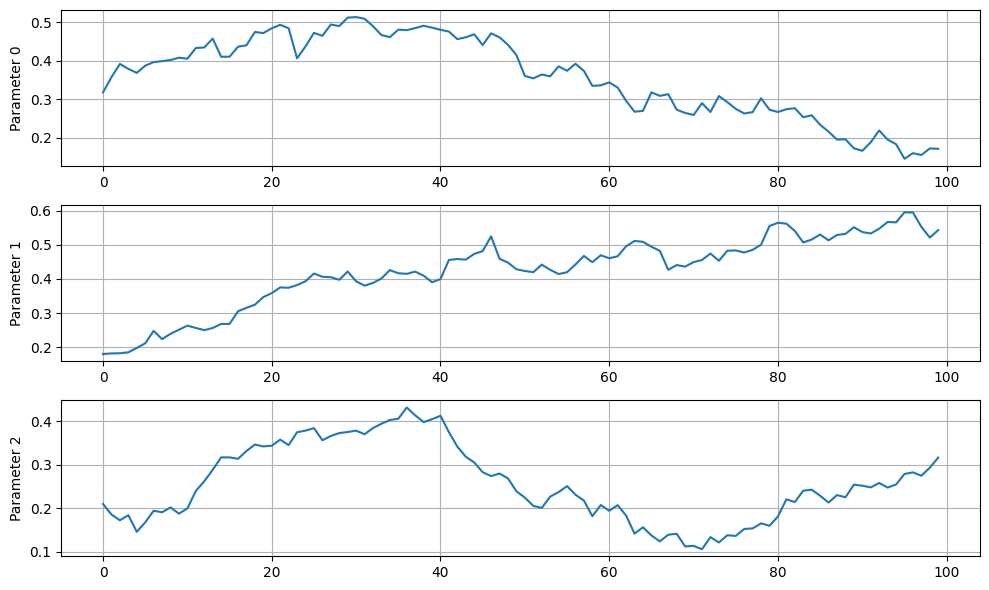

In [39]:
try:
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 6))
    for i in range(3):
        axes[i].plot(samples_np[:, i])
        axes[i].set_ylabel(f'Parameter {i}')
        axes[i].grid(True)
    axes[-1].set_xlabel('')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("matplotlib not available for plotting")

## 7. Try NUTS Sampler (Optional)

The No-U-Turn Sampler (NUTS) is an adaptive variant of HMC that automatically tunes the number of leapfrog steps.

In [40]:
# Uncomment to run NUTS (takes longer than HMC)
print("Running NUTS sampler...")
nuts_samples, nuts_results = run_chain_nut(
    model,
    initial_state,
    _step_size=step_size,
    num_results=50,
    num_burnin_steps=25,
    mtd=5
)
print(f"NUTS sampling complete! Samples shape: {nuts_samples.shape}")

Running NUTS sampler...
NUTS sampling complete! Samples shape: (50, 60)


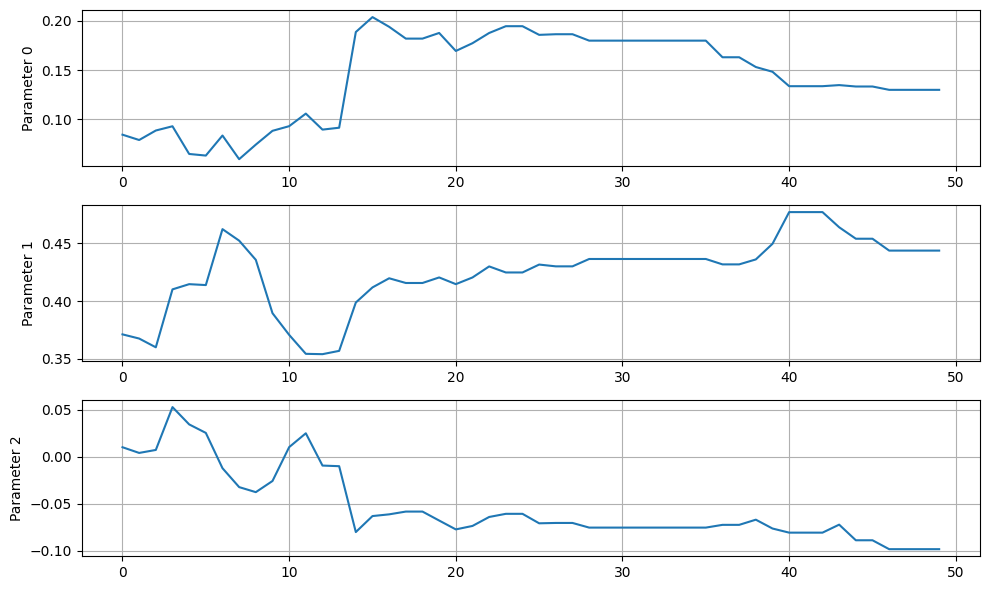

In [42]:
try:
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 6))
    for i in range(3):
        axes[i].plot(nuts_samples[:, i])
        axes[i].set_ylabel(f'Parameter {i}')
        axes[i].grid(True)
    axes[-1].set_xlabel('')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("matplotlib not available for plotting")